In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [ ]:
file_path = '/content/drive/Shareddrives/CPE313/Yelp_AcademicDataset/dataset_finals.csv'
df = pd.read_csv(file_path)

In [ ]:
df['cleanText'] = df['cleanText'].astype(str).fillna('')

In [ ]:
def get_sentiment_label(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['sentiment'] = df['cleanText'].apply(get_sentiment_label)

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    79608
neutral     14988
negative     5404
Name: count, dtype: int64

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleanText,sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,decide eat aware going take hours beginning en...,positive
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,taken lot spin classes years nothing compares ...,positive
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,family diner buffet eclectic assortment large ...,positive
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,wow yummy different delicious favorite lamb cu...,positive
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,cute interior owner gave tour upcoming patio r...,positive


In [ ]:
file_path = '/content/drive/Shareddrives/CPE313/Yelp_AcademicDataset/sentiment_dataset.csv'
df.to_csv(file_path, index=False)

In [ ]:
X = df['cleanText']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vocab_size = 10000
max_length = 100
embedding_dim = 50

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# CNN Model

In [ ]:
model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_cnn = model_cnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded), verbose=1)

Epoch 1/10
2500/2500 [==============================] - 90s 35ms/step - loss: 0.2742 - accuracy: 0.8854 - val_loss: 0.2167 - val_accuracy: 0.9086
Epoch 2/10
2500/2500 [==============================] - 83s 33ms/step - loss: 0.1419 - accuracy: 0.9427 - val_loss: 0.2086 - val_accuracy: 0.9160
Epoch 3/10
2500/2500 [==============================] - 85s 34ms/step - loss: 0.0604 - accuracy: 0.9780 - val_loss: 0.2722 - val_accuracy: 0.9130
Epoch 4/10
2500/2500 [==============================] - 80s 32ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 0.4315 - val_accuracy: 0.9082
Epoch 5/10
2500/2500 [==============================] - 80s 32ms/step - loss: 0.0242 - accuracy: 0.9912 - val_loss: 0.4271 - val_accuracy: 0.9090
Epoch 6/10
2500/2500 [==============================] - 84s 34ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.4361 - val_accuracy: 0.9051
Epoch 7/10
2500/2500 [==============================] - 81s 32ms/step - loss: 0.0150 - accuracy: 0.9946 - val_loss: 0.4949 -

In [ ]:
# Evaluate model
loss, accuracy = model_cnn.evaluate(X_test_padded, y_test_encoded)
print(f'CNN Test Accuracy: {accuracy}')

625/625 [==============================] - 5s 8ms/step - loss: 0.5562 - accuracy: 0.9119
CNN Test Accuracy: 0.9119499921798706


In [85]:
y_pred_cnn = model_cnn.predict(X_test_padded)
y_pred_cnn_labels = y_pred_cnn.argmax(axis=1)

625/625 [==============================] - 10s 15ms/step


#LSTM Model

In [ ]:
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64, return_sequences=True),
    Dropout(0.5),
    LSTM(units=64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_lstm = model_lstm.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded), verbose=1)

Epoch 1/10
2500/2500 [==============================] - 356s 141ms/step - loss: 0.5842 - accuracy: 0.7971 - val_loss: 0.5838 - val_accuracy: 0.7969
Epoch 2/10
2500/2500 [==============================] - 351s 140ms/step - loss: 0.6064 - accuracy: 0.7959 - val_loss: 0.4438 - val_accuracy: 0.8175
Epoch 3/10
2500/2500 [==============================] - 347s 139ms/step - loss: 0.2423 - accuracy: 0.8989 - val_loss: 0.1670 - val_accuracy: 0.9347
Epoch 4/10
2500/2500 [==============================] - 354s 141ms/step - loss: 0.1368 - accuracy: 0.9457 - val_loss: 0.1501 - val_accuracy: 0.9396
Epoch 5/10
2500/2500 [==============================] - 356s 142ms/step - loss: 0.1008 - accuracy: 0.9613 - val_loss: 0.1619 - val_accuracy: 0.9388
Epoch 6/10
2500/2500 [==============================] - 357s 143ms/step - loss: 0.0743 - accuracy: 0.9723 - val_loss: 0.1911 - val_accuracy: 0.9336
Epoch 7/10
2500/2500 [==============================] - 352s 141ms/step - loss: 0.0554 - accuracy: 0.9806 - val_

In [ ]:
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_padded, y_test_encoded)
print(f'LSTM Test Accuracy: {accuracy_lstm}')

625/625 [==============================] - 23s 37ms/step - loss: 0.3294 - accuracy: 0.9254
LSTM Test Accuracy: 0.92535001039505


In [87]:
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_lstm_labels = y_pred_lstm.argmax(axis=1)

625/625 [==============================] - 34s 50ms/step


#Bidirectional LSTM Model

In [ ]:
model_bidirectional_lstm = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(units=64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model_bidirectional_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_bidirectional_lstm = model_bidirectional_lstm.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test_encoded), verbose=1)

Epoch 1/10
2500/2500 [==============================] - 722s 284ms/step - loss: 0.2683 - accuracy: 0.8886 - val_loss: 0.1925 - val_accuracy: 0.9195
Epoch 2/10
2500/2500 [==============================] - 692s 277ms/step - loss: 0.1466 - accuracy: 0.9404 - val_loss: 0.1825 - val_accuracy: 0.9269
Epoch 3/10
2500/2500 [==============================] - 691s 277ms/step - loss: 0.1067 - accuracy: 0.9585 - val_loss: 0.1749 - val_accuracy: 0.9331
Epoch 4/10
2500/2500 [==============================] - 643s 257ms/step - loss: 0.0810 - accuracy: 0.9689 - val_loss: 0.1919 - val_accuracy: 0.9309
Epoch 5/10
2500/2500 [==============================] - 689s 276ms/step - loss: 0.0613 - accuracy: 0.9769 - val_loss: 0.2113 - val_accuracy: 0.9246
Epoch 6/10
2500/2500 [==============================] - 739s 296ms/step - loss: 0.0488 - accuracy: 0.9822 - val_loss: 0.2476 - val_accuracy: 0.9253
Epoch 7/10
2500/2500 [==============================] - 659s 264ms/step - loss: 0.0362 - accuracy: 0.9877 - val_

In [ ]:
loss_bidirectional_lstm, accuracy_bidirectional_lstm = model_bidirectional_lstm.evaluate(X_test_padded, y_test_encoded)
print(f'Bidirectional LSTM Test Accuracy: {accuracy_bidirectional_lstm}')

625/625 [==============================] - 54s 86ms/step - loss: 0.3426 - accuracy: 0.9192
Bidirectional LSTM Test Accuracy: 0.9192000031471252


In [81]:
y_pred_bidirectional_lstm = model_bidirectional_lstm.predict(X_test_padded)
y_pred_bidirectional_lstm_labels = y_pred_bidirectional_lstm.argmax(axis=1)

625/625 [==============================] - 60s 96ms/step


# Calculating **precision** of each class (Positive, Negative, Neutral)

### **CNN**

In [89]:
precision_positive_cnn = precision_score(y_test_encoded, y_pred_cnn_labels, labels=[2], average=None)
precision_negative_cnn = precision_score(y_test_encoded, y_pred_cnn_labels, labels=[0], average=None)
precision_neutral_cnn = precision_score(y_test_encoded, y_pred_cnn_labels, labels=[1], average=None)

print("CNN Precision - Positive class:", precision_positive_cnn)
print("CNN Precision - Negative class:", precision_negative_cnn)
print("CNN Precision - Neutral class:", precision_neutral_cnn)

CNN Precision - Positive class: [0.95520159]
CNN Precision - Negative class: [0.85869565]
CNN Precision - Neutral class: [0.70193548]


### **LSTM**

In [90]:
precision_positive_lstm = precision_score(y_test_encoded, y_pred_lstm_labels, labels=[2], average=None)
precision_negative_lstm = precision_score(y_test_encoded, y_pred_lstm_labels, labels=[0], average=None)
precision_neutral_lstm = precision_score(y_test_encoded, y_pred_lstm_labels, labels=[1], average=None)

print("LSTM Precision - Positive class:", precision_positive_lstm)
print("LSTM Precision - Negative class:", precision_negative_lstm)
print("LSTM Precision - Neutral class:", precision_neutral_lstm)

LSTM Precision - Positive class: [0.95880057]
LSTM Precision - Negative class: [0.85315408]
LSTM Precision - Neutral class: [0.76279391]


### **BiLSTM**

In [84]:
from sklearn.metrics import precision_score

precision_positive_bidirectional_lstm = precision_score(y_test_encoded, y_pred_bidirectional_lstm_labels, labels=[2], average=None)
precision_negative_bidirectional_lstm = precision_score(y_test_encoded, y_pred_bidirectional_lstm_labels, labels=[0], average=None)
precision_neutral_bidirectional_lstm = precision_score(y_test_encoded, y_pred_bidirectional_lstm_labels, labels=[1], average=None)

print("Bidirectional LSTM Precision - Positive class:", precision_positive_bidirectional_lstm)
print("Bidirectional LSTM Precision - Negative class:", precision_negative_bidirectional_lstm)
print("Bidirectional LSTM Precision - Neutral class:", precision_neutral_bidirectional_lstm)

Bidirectional LSTM Precision - Positive class: [0.95388694]
Bidirectional LSTM Precision - Negative class: [0.79038113]
Bidirectional LSTM Precision - Neutral class: [0.76204707]


# Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

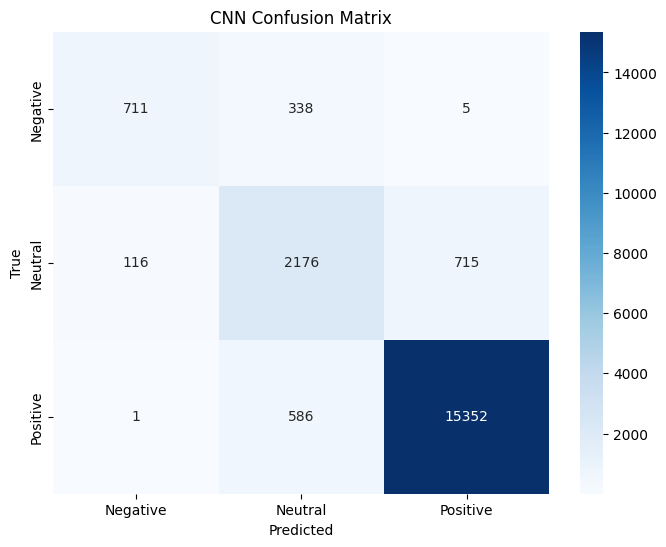

In [94]:
plot_confusion_matrix(y_test_encoded, y_pred_cnn_labels, "CNN Confusion Matrix")

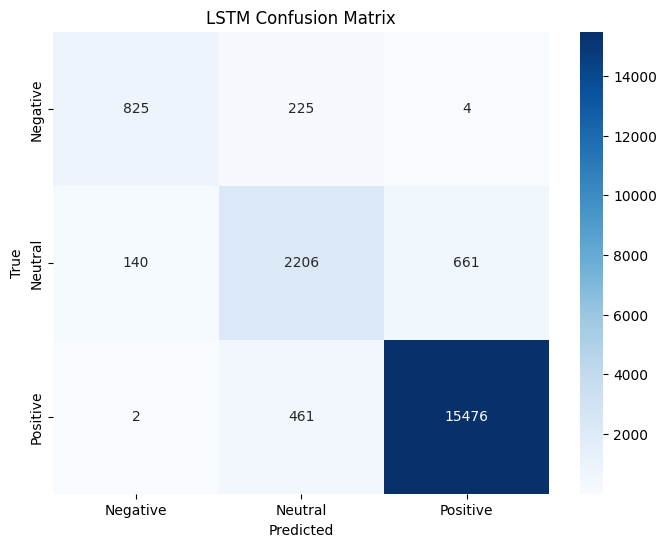

In [95]:
plot_confusion_matrix(y_test_encoded, y_pred_lstm_labels, "LSTM Confusion Matrix")

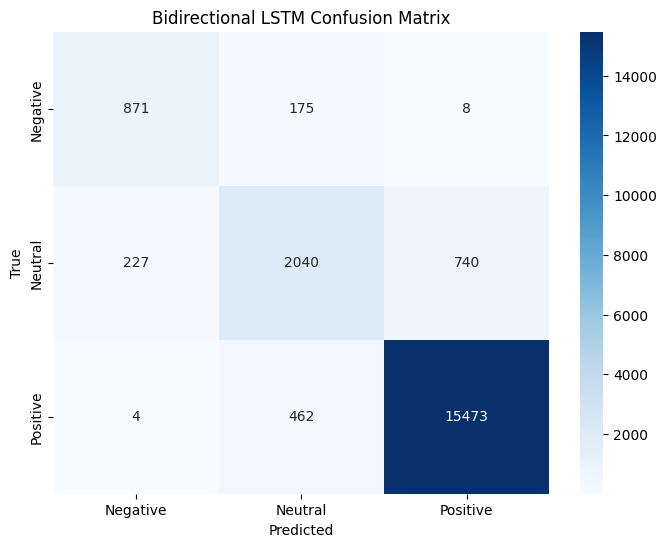

In [96]:
plot_confusion_matrix(y_test_encoded, y_pred_bidirectional_lstm_labels, "Bidirectional LSTM Confusion Matrix")

In [100]:
# Compute confusion matrices
cm_cnn = confusion_matrix(y_test_encoded, y_pred_cnn_labels)
cm_lstm = confusion_matrix(y_test_encoded, y_pred_lstm_labels)
cm_bidirectional_lstm = confusion_matrix(y_test_encoded, y_pred_bidirectional_lstm_labels)

print("CNN Confusion Matrix:")
print(cm_cnn)
print("\n")

print("LSTM Confusion Matrix:")
print(cm_lstm)
print("\n")

print("Bidirectional LSTM Confusion Matrix:")
print(cm_bidirectional_lstm)

CNN Confusion Matrix:
[[  711   338     5]
 [  116  2176   715]
 [    1   586 15352]]


LSTM Confusion Matrix:
[[  825   225     4]
 [  140  2206   661]
 [    2   461 15476]]


Bidirectional LSTM Confusion Matrix:
[[  871   175     8]
 [  227  2040   740]
 [    4   462 15473]]
